In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
path = '/content/drive/MyDrive/422 project/heart_desease_data.csv'
df = pd.read_csv(path)
df.shape

(1028, 14)

In [ ]:
num_data_points = len(df)
print("Number of data points:", num_data_points)

Number of data points: 1028


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,age,sex,chestpain,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,52.0,M,Typical angina,125.0,212.0,False,ST-T,168.0,No,1.0,Downsloping,2,3.0,No
1,53.0,M,Typical angina,140.0,203.0,True,Nothing,155.0,Yes,3.1,Upsloping,0,3.0,No
2,70.0,M,Typical angina,145.0,174.0,False,ST-T,125.0,Yes,2.6,Upsloping,0,3.0,No
3,61.0,M,Typical angina,148.0,203.0,False,ST-T,NaN,No,0.0,Downsloping,1,3.0,No
4,62.0,F,Typical angina,138.0,294.0,True,ST-T,106.0,No,1.9,Flatsloping,3,2.0,No


In [ ]:
df.tail()

,age,sex,chestpain,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slop,ca,thal,target
1023,59.0,M,Atypical angina,140.0,221.0,False,ST-T,164.0,Yes,0.0,Downsloping,0,2.0,Yes
1024,60.0,M,Typical angina,125.0,258.0,False,Nothing,141.0,Yes,2.8,Flatsloping,1,3.0,No
1025,NaN,M,Typical angina,110.0,275.0,False,Nothing,118.0,Yes,1.0,Flatsloping,1,2.0,No
1026,50.0,F,NaN,110.0,254.0,False,Nothing,159.0,No,0.0,Downsloping,0,2.0,Yes
1027,54.0,M,Typical angina,120.0,188.0,False,ST-T,113.0,No,1.4,Flatsloping,1,3.0,No


In [ ]:
df["target"].value_counts()

Yes    528
No     500
Name: target, dtype: int64

<Axes: >

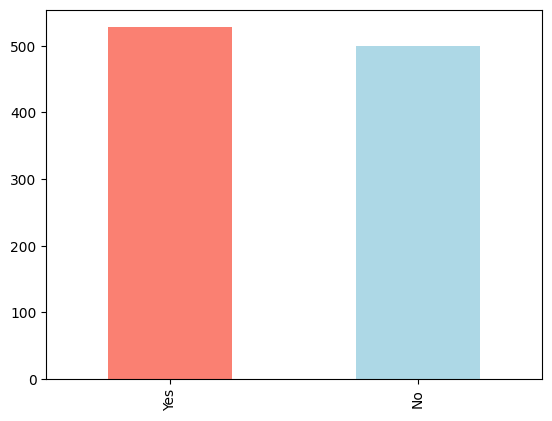

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1010 non-null   float64
 1   sex        1028 non-null   object 
 2   chestpain  1012 non-null   object 
 3   trestbps   1014 non-null   float64
 4   chol       1020 non-null   float64
 5   fps        1024 non-null   object 
 6   restecg    1010 non-null   object 
 7   thalach    1005 non-null   float64
 8   exang      1027 non-null   object 
 9   oldpeak    1026 non-null   float64
 10  slop       1020 non-null   object 
 11  ca         1028 non-null   int64  
 12  thal       1001 non-null   float64
 13  target     1028 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 112.6+ KB


In [ ]:
df.isna().sum()

age          18
sex           0
chestpain    16
trestbps     14
chol          8
fps           4
restecg      18
thalach      23
exang         1
oldpeak       2
slop          8
ca            0
thal         27
target        0
dtype: int64

In [ ]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca,thal
count,1010.000000,1014.000000,1020.000000,1005.000000,1026.000000,1028.000000,1001.000000
mean,54.437624,131.647929,246.068627,149.104478,1.071930,0.751946,2.320679
std,9.082300,17.603265,51.459934,23.056099,1.174731,1.030095,0.619727
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,132.000000,0.000000,0.000000,2.000000
50%,56.000000,130.000000,240.000000,152.000000,0.800000,0.000000,2.000000
75%,61.000000,140.000000,275.000000,166.000000,1.800000,1.000000,3.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,3.000000


# **Imputing Null values**

In [ ]:
mean_age = df['age'].mean()

df['age'] = df['age'].fillna(int(mean_age))

In [ ]:
median_trestbps = df['trestbps'].median()

df['trestbps'] = df['trestbps'].fillna(median_trestbps)

In [ ]:
median_chol = df['chol'].median()

df['chol'] = df['chol'].fillna(median_chol)

In [ ]:
median_thalach = df['thalach'].median()

df['thalach'] = df['thalach'].fillna(median_thalach)

In [ ]:
median_thal = df['thal'].median()

df['thal'] = df['thal'].fillna(median_thal)

In [ ]:
df.isna().sum()

age           0
sex           0
chestpain    16
trestbps      0
chol          0
fps           4
restecg      18
thalach       0
exang         1
oldpeak       2
slop          8
ca            0
thal          0
target        0
dtype: int64

# **Removing Null values**

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.isnull().sum()

age          0
sex          0
chestpain    0
trestbps     0
chol         0
fps          0
restecg      0
thalach      0
exang        0
oldpeak      0
slop         0
ca           0
thal         0
target       0
dtype: int64

# **Encoding Categorical features**

In [ ]:
df['sex'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df['chestpain'].unique()

array(['Typical angina', 'Atypical angina', 'Non-anginal pain',
       'Asymptomatic'], dtype=object)

In [ ]:
df['fps'].unique()

array([False, True], dtype=object)

In [ ]:
df['restecg'].unique()

array(['ST-T', 'Nothing', 'Possible'], dtype=object)

In [ ]:
df['exang'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['slop'].unique()

array(['Downsloping', 'Upsloping', 'Flatsloping'], dtype=object)

In [ ]:
df['target'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['sex'] = df['sex'].map({'M':1,'F':0})

In [ ]:
df.head()

,age,sex,chestpain,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,52.0,1,Typical angina,125.0,212.0,False,ST-T,168.0,No,1.0,Downsloping,2,3.0,No
1,53.0,1,Typical angina,140.0,203.0,True,Nothing,155.0,Yes,3.1,Upsloping,0,3.0,No
2,70.0,1,Typical angina,145.0,174.0,False,ST-T,125.0,Yes,2.6,Upsloping,0,3.0,No
3,61.0,1,Typical angina,148.0,203.0,False,ST-T,152.0,No,0.0,Downsloping,1,3.0,No
4,62.0,0,Typical angina,138.0,294.0,True,ST-T,106.0,No,1.9,Flatsloping,3,2.0,No


In [ ]:
df['chestpain'] = df['chestpain'].map({'Typical angina':0, 'Atypical angina':1, 'Non-anginal pain':2,
       'Asymptomatic':3})

In [ ]:
df['fps'] = df['fps'].astype(int)

In [ ]:
df['restecg'] = df['restecg'].map({'Nothing':0,'ST-T':1,'Possible':2})

In [ ]:
df['exang'] = df['exang'].map({'Yes':1,'No':0})

In [ ]:
df['slop'] = df['slop'].map({'Upsloping':0,'Downsloping':2,'Flatsloping':1})

In [ ]:
df['target'] = df['target'].map({'Yes':1,'No':0})

In [ ]:
df.head()

,age,sex,chestpain,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3.0,0
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3.0,0
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3.0,0
3,61.0,1,0,148.0,203.0,0,1,152.0,0,0.0,2,1,3.0,0
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2.0,0


In [ ]:
df.tail()

,age,sex,chestpain,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slop,ca,thal,target
1022,47.0,1,0,112.0,204.0,0,1,143.0,0,0.1,2,0,2.0,1
1023,59.0,1,1,140.0,221.0,0,1,164.0,1,0.0,2,0,2.0,1
1024,60.0,1,0,125.0,258.0,0,0,141.0,1,2.8,1,1,3.0,0
1025,54.0,1,0,110.0,275.0,0,0,118.0,1,1.0,1,1,2.0,0
1027,54.0,1,0,120.0,188.0,0,1,113.0,0,1.4,1,1,3.0,0


# **Heart desease frequency according to sex**

In [ ]:
df.sex.value_counts()

1    688
0    294
Name: sex, dtype: int64

In [ ]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,81,399
1,213,289


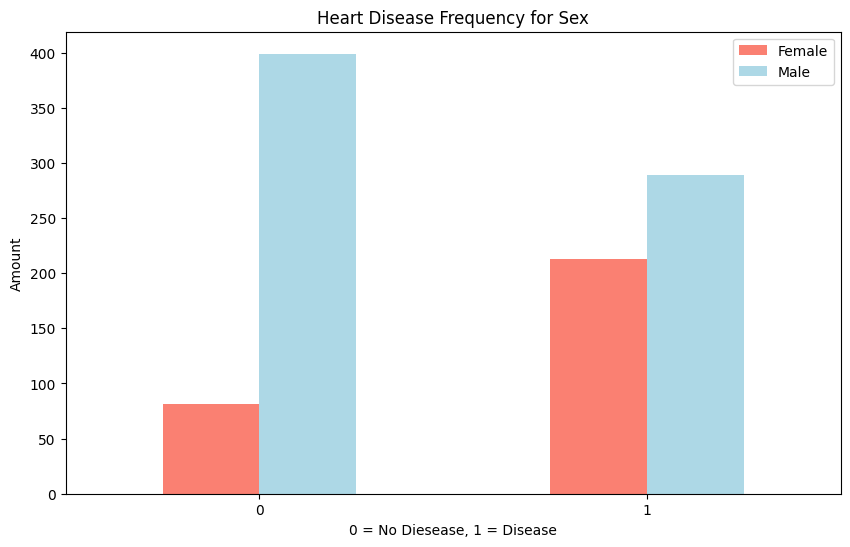

In [ ]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

# **Age vs. Max Heart Rate for Heart Disease**

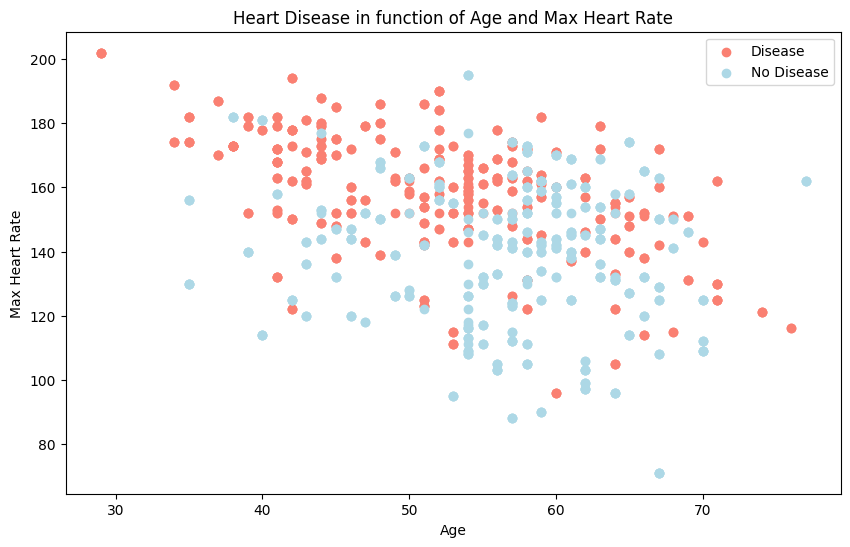

In [ ]:
plt.figure(figsize=(10, 6))


plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")


plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")


plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

<Axes: ylabel='Frequency'>

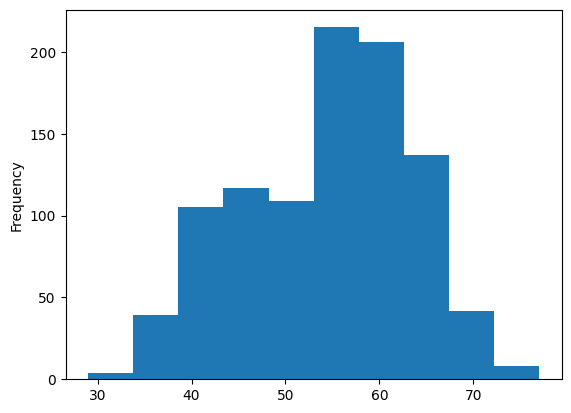

In [ ]:
df.age.plot.hist()

# **Heart Disease Frequency per Chest Pain Type**
0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease




In [ ]:
pd.crosstab(df.chestpain, df.target)

target,0,1
chestpain,,
0,362,116
1,31,127
2,63,209
3,24,50


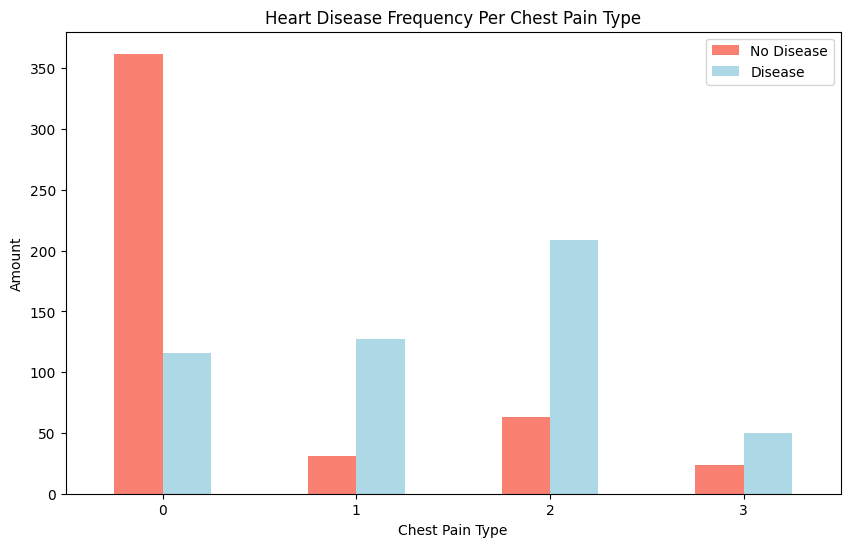

In [ ]:
pd.crosstab(df.chestpain, df.target).plot(kind="bar",figsize=(10, 6),color=["salmon", "lightblue"])


plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [ ]:
df.head()

,age,sex,chestpain,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3.0,0
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3.0,0
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3.0,0
3,61.0,1,0,148.0,203.0,0,1,152.0,0,0.0,2,1,3.0,0
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2.0,0


In [ ]:
df.corr()

,age,sex,chestpain,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slop,ca,thal,target
age,1.000000,-0.103802,-0.079244,0.256766,0.214794,0.124736,-0.136353,-0.397563,0.097636,0.215799,-0.178918,0.279233,0.087476,-0.245430
sex,-0.103802,1.000000,-0.039629,-0.081999,-0.194059,0.026783,-0.054493,-0.040273,0.136088,0.081528,-0.019857,0.113434,0.191086,-0.278924
chestpain,-0.079244,-0.039629,1.000000,0.031733,-0.081657,0.076633,0.036745,0.297486,-0.394848,-0.175227,0.128265,-0.173785,-0.164163,0.440202
trestbps,0.256766,-0.081999,0.031733,1.000000,0.119741,0.184540,-0.118604,-0.031816,0.064391,0.185588,-0.128559,0.103843,0.059684,-0.144438
chol,0.214794,-0.194059,-0.081657,0.119741,1.000000,0.031561,-0.143534,-0.023108,0.075001,0.068581,-0.017753,0.079192,0.100237,-0.112965
fps,0.124736,0.026783,0.076633,0.184540,0.031561,1.000000,-0.102988,-0.011954,0.058050,0.008717,-0.064889,0.137695,-0.038412,-0.037910
restecg,-0.136353,-0.054493,0.036745,-0.118604,-0.143534,-0.102988,1.000000,0.042088,-0.066005,-0.054777,0.084477,-0.087555,-0.030178,0.143784
thalach,-0.397563,-0.040273,0.297486,-0.031816,-0.023108,-0.011954,0.042088,1.000000,-0.368432,-0.339074,0.390870,-0.198910,-0.087707,0.416891
exang,0.097636,0.136088,-0.394848,0.064391,0.075001,0.058050,-0.066005,-0.368432,1.000000,0.308782,-0.263427,0.096498,0.178434,-0.428897
oldpeak,0.215799,0.081528,-0.175227,0.185588,0.068581,0.008717,-0.054777,-0.339074,0.308782,1.000000,-0.582493,0.214245,0.212784,-0.439201


(14.5, -0.5)

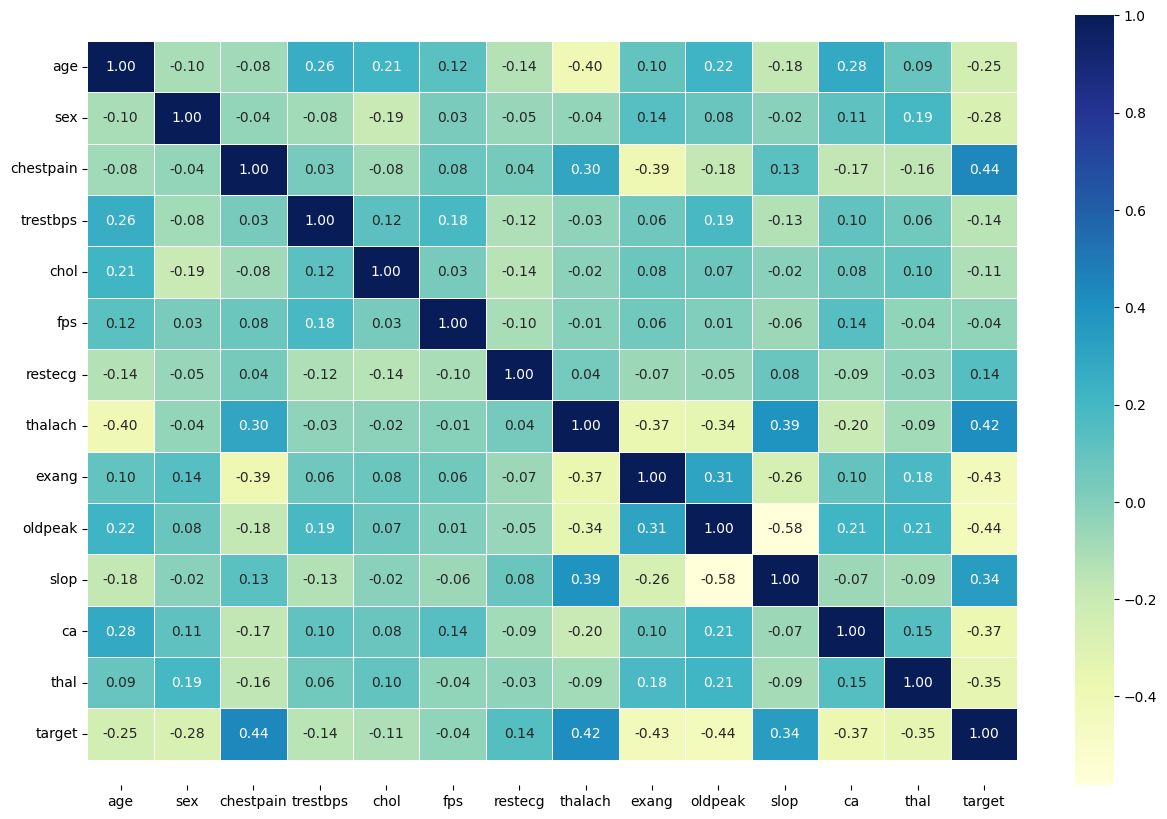

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# **Modelling**

In [ ]:
df.head()

,age,sex,chestpain,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3.0,0
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3.0,0
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3.0,0
3,61.0,1,0,148.0,203.0,0,1,152.0,0,0.0,2,1,3.0,0
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2.0,0


In [ ]:
X = df.drop("target", axis=1)

y = df["target"]

In [ ]:
X

,age,sex,chestpain,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slop,ca,thal
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3.0
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3.0
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3.0
3,61.0,1,0,148.0,203.0,0,1,152.0,0,0.0,2,1,3.0
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,47.0,1,0,112.0,204.0,0,1,143.0,0,0.1,2,0,2.0
1023,59.0,1,1,140.0,221.0,0,1,164.0,1,0.0,2,0,2.0
1024,60.0,1,0,125.0,258.0,0,0,141.0,1,2.8,1,1,3.0
1025,54.0,1,0,110.0,275.0,0,0,118.0,1,1.0,1,1,2.0


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1022    1
1023    1
1024    0
1025    0
1027    0
Name: target, Length: 982, dtype: int64

In [ ]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
X_train

,age,sex,chestpain,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slop,ca,thal
824,62.0,0,0,140.0,268.0,0,0,160.0,0,3.6,0,2,2.0
554,54.0,1,0,122.0,286.0,0,0,116.0,1,3.2,1,2,2.0
825,60.0,1,0,130.0,253.0,0,1,144.0,1,1.4,2,1,3.0
530,62.0,0,0,124.0,209.0,0,1,163.0,0,0.0,2,0,2.0
458,69.0,1,3,160.0,234.0,1,0,131.0,0,0.1,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,44.0,1,0,120.0,169.0,0,1,152.0,1,2.8,0,0,1.0
293,52.0,1,2,138.0,223.0,0,1,169.0,0,0.0,2,4,2.0
900,52.0,1,1,134.0,201.0,0,1,158.0,0,0.8,2,1,2.0
464,48.0,1,2,124.0,255.0,1,1,175.0,0,0.0,2,2,2.0


In [ ]:
y_train, len(y_train)

(824    0
 554    0
 825    0
 530    1
 458    1
       ..
 124    0
 293    1
 900    1
 464    1
 119    0
 Name: target, Length: 687, dtype: int64,
 687)

# **KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

#Find F1 Accuracy
f1 = f1_score(y_test,y_pred)
print("F1 accuracy:{:.2f}%".format(f1 * 100))
# Print accuracy and confusion matrix
print("Accuracy: {:.2f}%".format(accuracy1 * 100))
print("Confusion Matrix:\n", confusion_mat)

F1 accuracy:70.93%
Accuracy: 69.15%
Confusion Matrix:
 [[ 93  57]
 [ 34 111]]


<Axes: >

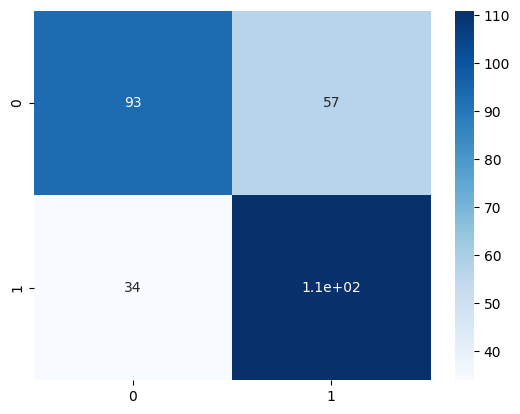

In [ ]:
import seaborn as sns

sns.heatmap(confusion_mat, annot=True, cmap='Blues')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67       150
           1       0.66      0.77      0.71       145

    accuracy                           0.69       295
   macro avg       0.70      0.69      0.69       295
weighted avg       0.70      0.69      0.69       295



# **Decision Tree**

In [ ]:

clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)



y_true = y_test # true class labels of test set
y_pred = clf.predict(X_test) # predicted class labels of test set

cm = confusion_matrix(y_true, y_pred)

#Find F1 Accuracy
f1 = f1_score(y_test,y_pred)
print("F1 accuracy:{:.2f}%".format(f1 * 100))
# Calculate accuracy of the model
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy2 * 100))

print(cm)

F1 accuracy:95.95%
Accuracy: 95.93%
[[141   9]
 [  3 142]]


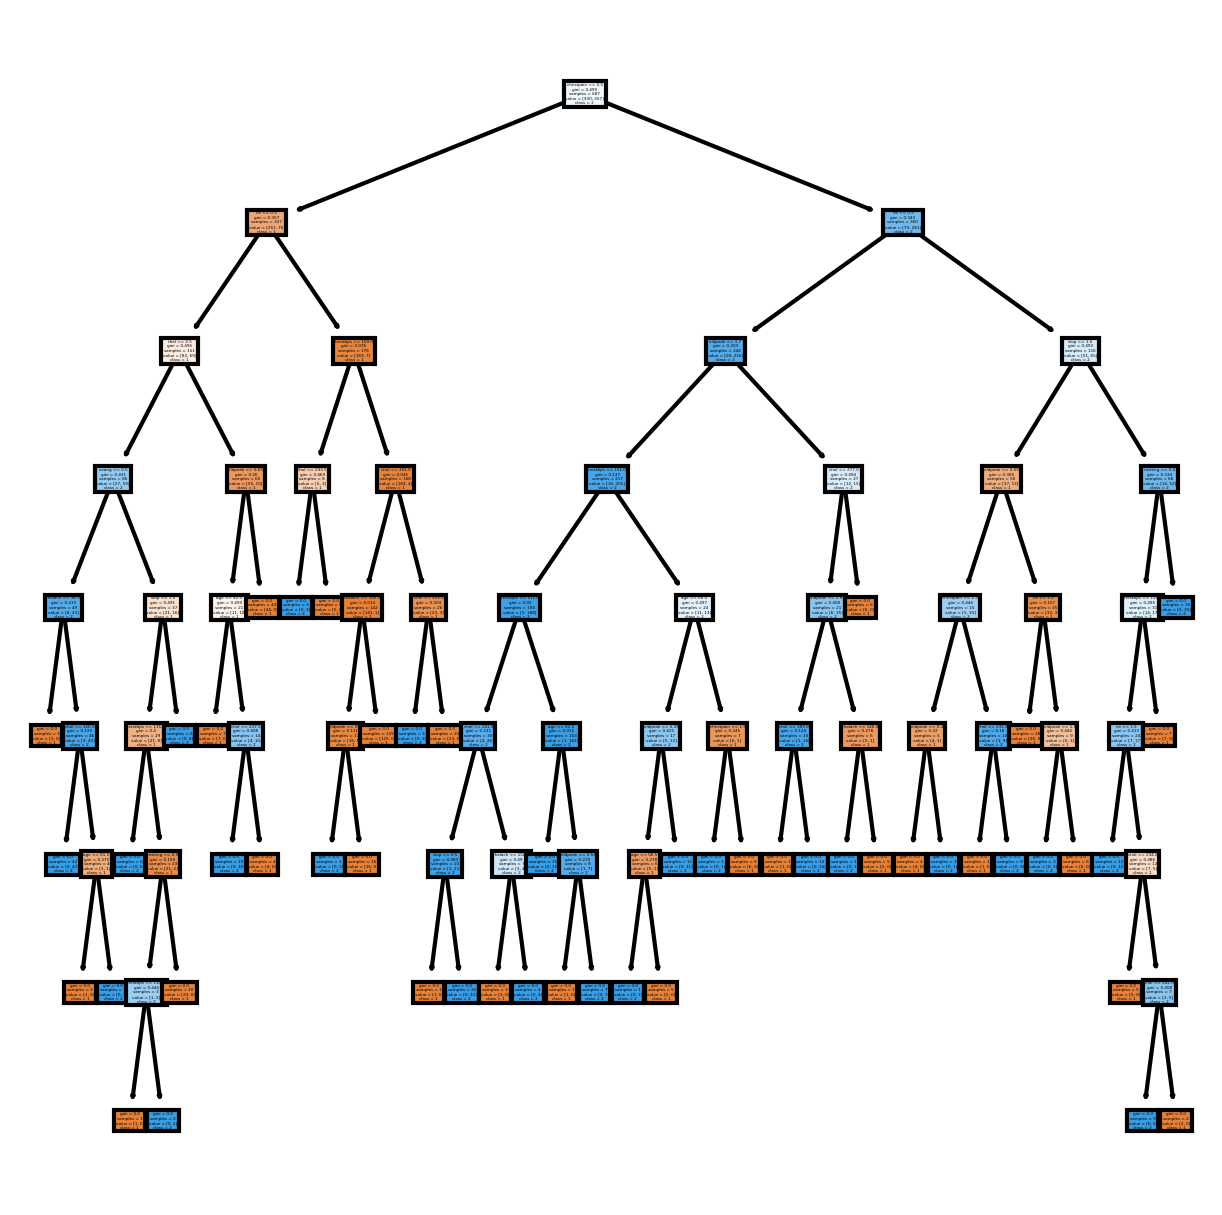

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(clf,
               feature_names = X.columns,
               class_names=['1','2','3','4','5','6','7'],
               filled = True);

<Axes: >

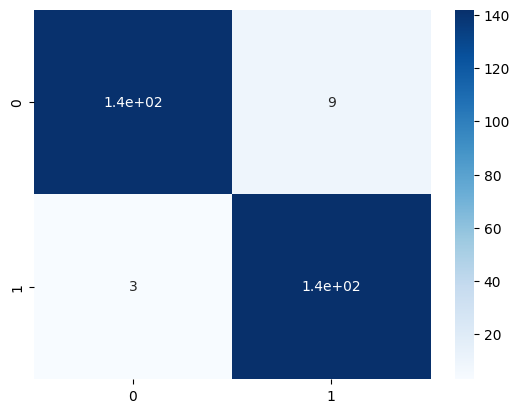

In [ ]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       150
           1       0.94      0.98      0.96       145

    accuracy                           0.96       295
   macro avg       0.96      0.96      0.96       295
weighted avg       0.96      0.96      0.96       295



# **SVM**

In [ ]:

clf = SVC(kernel='poly')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

y_true = y_test
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_true, y_pred)


#Find F1 Accuracy
f1 = f1_score(y_test,y_pred)
print("F1 accuracy:{:.2f}%".format(f1 * 100))
# Calculate accuracy of the model
accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy3 * 100))
print(cm)

F1 accuracy:68.17%
Accuracy: 66.44%
[[ 90  60]
 [ 39 106]]


<Axes: >

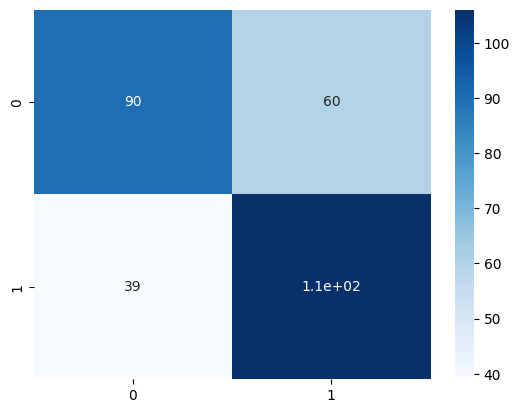

In [ ]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.60      0.65       150
           1       0.64      0.73      0.68       145

    accuracy                           0.66       295
   macro avg       0.67      0.67      0.66       295
weighted avg       0.67      0.66      0.66       295



# **Logistic Regression**

In [ ]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy4 = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

#Find F1 Accuracy
f1 = f1_score(y_test,y_pred)
print("F1 accuracy:{:.2f}%".format(f1 * 100))
# Print accuracy and confusion matrix
print("Accuracy: {:.2f}%".format(accuracy4 * 100))
print("Confusion Matrix:\n", confusion_mat)

F1 accuracy:83.44%
Accuracy: 83.05%
Confusion Matrix:
 [[119  31]
 [ 19 126]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

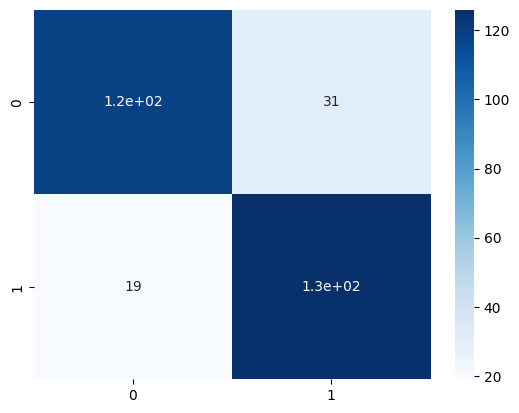

In [ ]:
import seaborn as sns

sns.heatmap(confusion_mat, annot=True, cmap='Blues')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       150
           1       0.80      0.87      0.83       145

    accuracy                           0.83       295
   macro avg       0.83      0.83      0.83       295
weighted avg       0.83      0.83      0.83       295



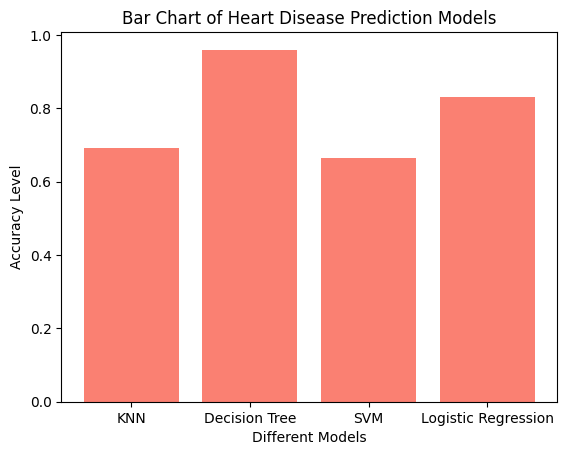

In [ ]:
import matplotlib.pyplot as plt

x_axis = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
y_axis = [accuracy1, accuracy2, accuracy3, accuracy4]

plt.bar(x_axis, y_axis,color= 'salmon')
plt.title('Bar Chart of Heart Disease Prediction Models')
plt.xlabel('Different Models')
plt.ylabel('Accuracy Level')
plt.show()